#Contexto
Embora tenha havido muitos estudos realizados no passado sobre fatores que afetam a expectativa de vida, considerando variáveis ​​demográficas, composição de renda e taxas de mortalidade. Verificou-se que o efeito da imunização e o índice de desenvolvimento humano não eram levados em consideração no passado. Além disso, algumas das pesquisas anteriores foram feitas considerando a regressão linear múltipla com base no conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores mencionados anteriormente, formulando um modelo de regressão baseado no modelo de efeitos mistos e regressão linear múltipla, considerando dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como Hepatite B, Poliomielite e Difteria também serão consideradas. Em poucas palavras, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações deste conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator preditivo que está contribuindo para o menor valor da expectativa de vida. Isso ajudará a sugerir a um país qual área deve ser dada importância para melhorar de forma eficiente a expectativa de vida de sua população.


#Dados
O projeto depende da precisão dos dados. O repositório de dados do Global Health Observatory (GHO) sob a Organização Mundial da Saúde (OMS) acompanha o estado de saúde, bem como muitos outros fatores relacionados para todos os países. Os conjuntos de dados são disponibilizados ao público para fins de análise de dados de saúde. O conjunto de dados relacionados à expectativa de vida e fatores de saúde para 193 países foi coletado do mesmo site de repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde, foram escolhidos apenas os fatores críticos que são mais representativos. Observou-se que nos últimos 15 anos houve um grande desenvolvimento no setor de saúde, resultando na melhoria das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação com os últimos 30 anos. Portanto, neste projeto consideramos dados do ano 2000-2015 para 193 países para análise posterior. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. Na inspeção visual inicial dos dados, alguns valores ausentes foram mostrados. Como os conjuntos de dados eram da OMS, não encontramos erros evidentes. Os dados ausentes foram tratados no software R usando o comando Missmap. O resultado indicou que a maioria dos dados faltantes era para população, Hepatite B e PIB. Os dados que faltavam eram de países menos conhecidos como Vanuatu, Tonga, Togo, Cabo Verde, etc. Foi difícil encontrar todos os dados para esses países e, portanto, foi decidido excluir esses países do conjunto de dados do modelo final. O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2.938 linhas, o que significa 20 variáveis ​​de previsão. Todas as variáveis ​​de previsão foram então divididas em várias categorias amplas: fatores relacionados à imunização, fatores de mortalidade, fatores econômicos e fatores sociais.


## Features

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|


## Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#aumentando o limite de colunas a ser exbida
pd.set_option("display.max_columns", 400)

In [ ]:
dados = pd.read_csv('/content/Life-Expectancy-Data-Updated.csv')
dados

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


## Pre processamento para Analise exploratoria

In [ ]:
dados.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
#remove espaços no começo e fim do nome
dados = dados.rename(columns=lambda x: x.strip())

In [ ]:
# Mapeamento dos nomes das colunas
column_mapping = {
    'Country': 'Country',
    'Infant_deaths': 'infant deaths',
    'Under_five_deaths': 'under-five deaths',
    'Adult_mortality': 'Adult Mortality',
    'Alcohol_consumption': 'Alcohol',
    'Hepatitis_B': 'Hepatitis B',
    'Incidents_HIV': 'HIV/AIDS',
    'GDP_per_capita': 'GDP',
    'Population_mln': 'Population',
    'Thinness_ten_nineteen_years': 'thinness  1-19 years',
    'Thinness_five_nine_years': 'thinness 5-9 years',
    'Life_expectancy': 'Life expectancy'
}

#Renomeando as colunas
dados.rename(columns=column_mapping, inplace=True)
dados.columns

Index(['Country', 'Region', 'Year', 'infant deaths', 'under-five deaths',
       'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life expectancy'],
      dtype='object')

In [ ]:
# para esse projeto não iremos nos preocupar quando o y for NaN
dados = dados.drop(index=dados[dados['Life expectancy'].isna()].index)

In [ ]:
# convenção ser 20% teste
df_train, df_test = train_test_split(dados, test_size=0.20, random_state=42)

## Analise exploratoria

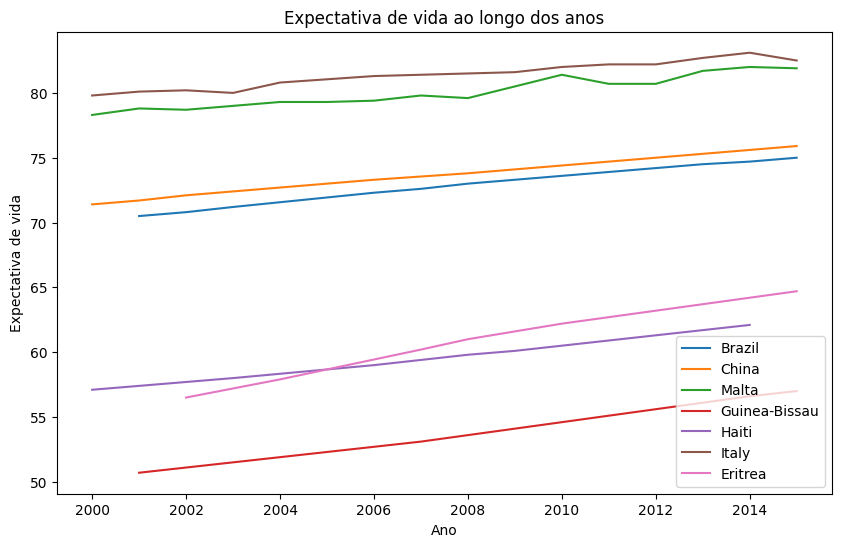

In [ ]:
import matplotlib.pyplot as plt

#criando lista dos paises
selected_countries = ['Brazil', 'China','Malta','Guinea-Bissau','Haiti','Italy','Eritrea']

#Criando o gráfico de linha para a expectativa de vida ao longo dos anos para cada país
plt.figure(figsize=(10, 6))

for country in selected_countries:
    filtered_data = df_train[df_train['Country'] == country]
    filtered_data = filtered_data.sort_values('Year')
    plt.plot(filtered_data['Year'], filtered_data['Life expectancy'], label=country)

#Configurando os detalhes do gráfico
plt.xlabel('Ano')
plt.ylabel('Expectativa de vida')
plt.title('Expectativa de vida ao longo dos anos')
plt.legend()
plt.show()


Fica claro que ao passar dos anos a expectativa de vida aumentou em todos os paises, também fica claro uma diferença muito expressiva entre alguns paises na expectativa de vida.

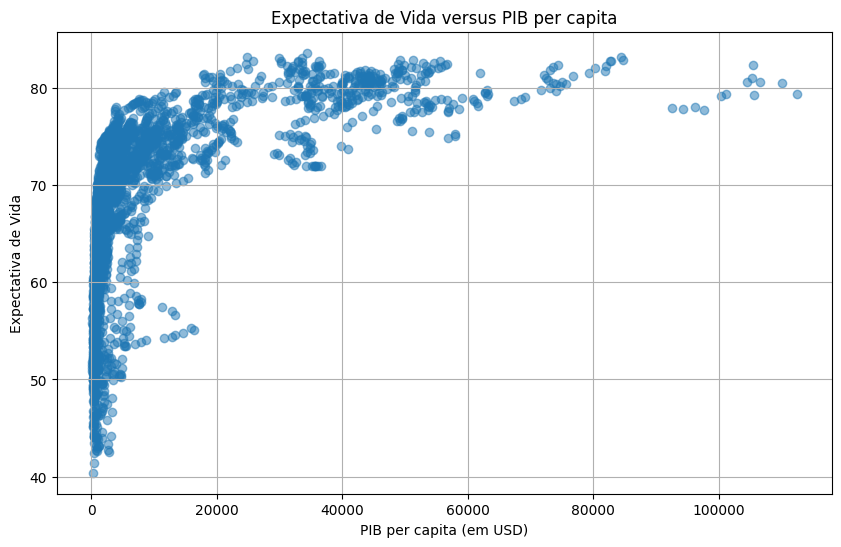

In [ ]:
import matplotlib.pyplot as plt

#Filtrando os dados para remover valores nulos
filtered_data = df_train.dropna(subset=['GDP', 'Life expectancy'])

#Definindo os dados para o eixo x (PIB per capita) e o eixo y (Expectativa de Vida)
x = filtered_data['GDP']
y = filtered_data['Life expectancy']

#Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

#Configurando os detalhes do gráfico
plt.xlabel('PIB per capita (em USD)')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de Vida versus PIB per capita')
plt.grid(True)
plt.show()


É possivel perceber uma crescente no pib quando a expectativa de vida é maior que 70 anos.

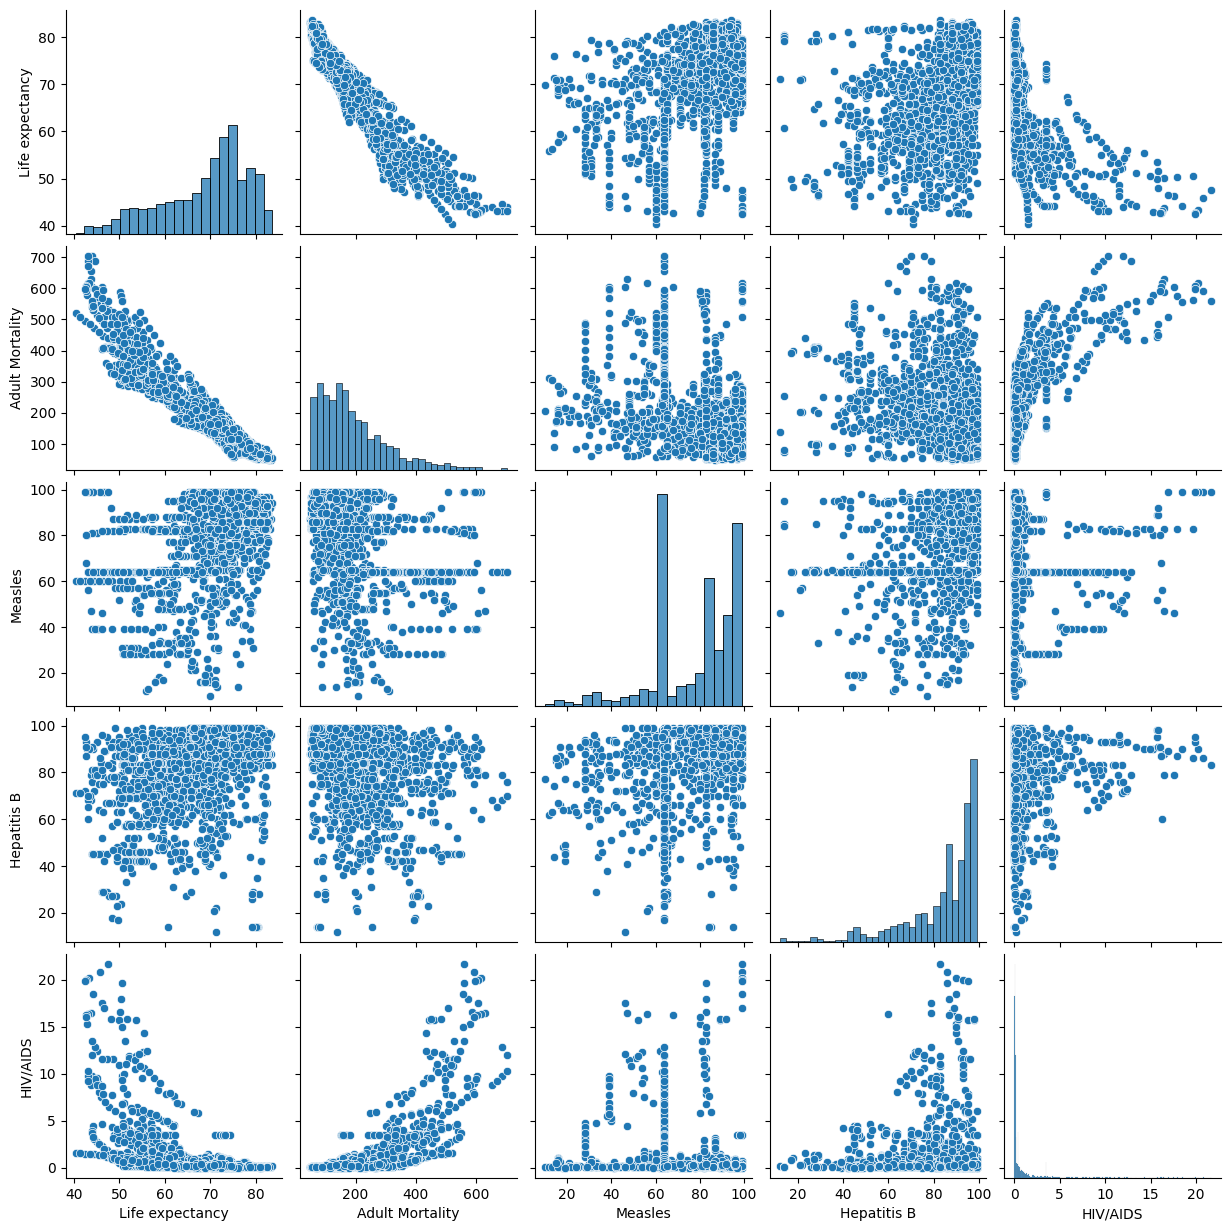

In [ ]:
import seaborn as sns

#Selecionando os fatores de saúde desejados
health_factors = ['Adult Mortality', 'Measles','Hepatitis B', 'HIV/AIDS']

#Selecionando apenas as colunas relevantes para a análise
selected_data = filtered_data[['Life expectancy'] + health_factors]

#Plotando a matriz de gráficos de dispersão
sns.pairplot(selected_data)
plt.show()


- Incidentes de HIV
  
   É possivel peceber uma diminuição no numero de casos conforme a expectativa de vida aumenta.
- Adult Mortality
  
  Existe uma correlação esperada de aumento de aumento da expectativa de vida com a redução da mortalidade adulta.
- Measles
  
  O aumento no numero de casos reportados de sarampo, indica uma maior expectativa de vida, provavelmente pelo fato do tratamento devido a doença.
- Hepatitis_B
  
  Existe uma correlação não muito clara em aumento na imunização da hepatitis com o aumento da expectativa de vida.

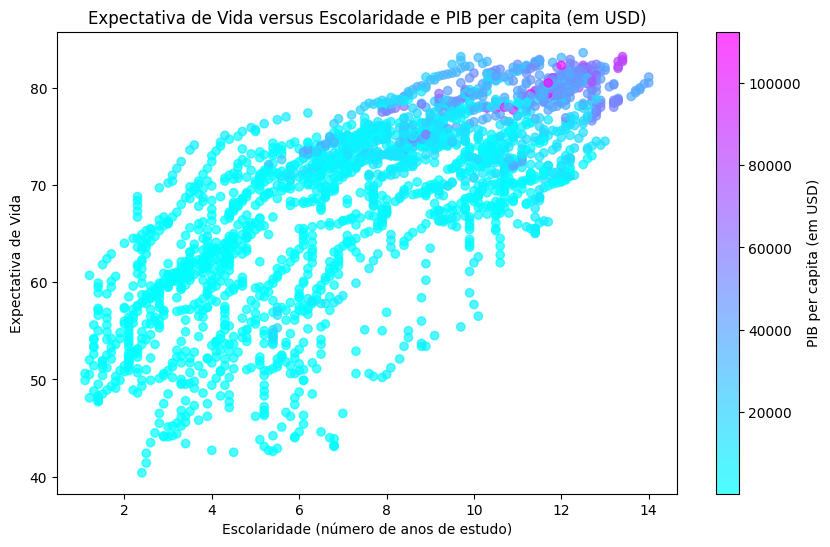

In [ ]:
import matplotlib.pyplot as plt

#Filtrando os dados para remover valores nulos
filtered_data = df_train.dropna(subset=['Schooling', 'Life expectancy', 'GDP'])

#Definindo os dados para o eixo x (escolaridade) e o eixo y (expectativa de vida)
x = filtered_data['Schooling']
y = filtered_data['Life expectancy']
income_composition = filtered_data['GDP']

#Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=income_composition, cmap='cool', alpha=0.7)

#Configurando os detalhes do gráfico
plt.xlabel('Escolaridade (número de anos de estudo)')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de Vida versus Escolaridade e PIB per capita (em USD)')
plt.colorbar(label='PIB per capita (em USD)')
plt.show()


È possivel perceber que quanto maior os anos de estudo, maior é a expectativa de vida, também podemos notar que o PiB per capta com valores mais altos esta presente em sua maioria nos paises com maiores anos de estudo.

##Pre_Prossessamento

In [ ]:
#Treino e teste divindo  o X e y
X_train = df_train.drop('Life expectancy', axis = 1)
y_train = df_train['Life expectancy']

X_test = df_test.drop('Life expectancy', axis = 1)
y_test = df_test['Life expectancy']

In [ ]:
X_train.drop(['Country','Region'],axis = 1,inplace =True)
X_test.drop(['Country','Region'],axis = 1,inplace =True)

##Modelo baseline


In [ ]:
#Modelo baseline de regressão linear
reg = LinearRegression()

reg.fit(X_train,y_train)
predict = reg.predict(X_test)

mean_squared_error(predict, y_test)

1.8332810646141477

##Feature Engineering

In [ ]:
# Lista de features originais
features = ['under-five deaths','infant deaths','Adult Mortality','HIV/AIDS','thinness 5-9 years','thinness  1-19 years','Alcohol','BMI']
features2 =['Hepatitis B','Measles','Polio','Diphtheria','Schooling','GDP']

# Função para atribuir o valor do rank com base no intervalo de quartis
def assign_rank(value):
    if value <= X_train[feature].quantile(0.25):
        return 0
    elif value <= X_train[feature].quantile(0.5):
        return 1
    elif value <= X_train[feature].quantile(0.75):
        return 2
    else:
        return 3
#função inversa
def inverse_assign_rank(value):
    if value <= X_train[feature].quantile(0.25):
        return 3  # Valor 3 para o intervalo 0-25
    elif value <= X_train[feature].quantile(0.5):
        return 2
    elif value <= X_train[feature].quantile(0.75):
        return 1
    else:
        return 0  # Valor 0 para o intervalo 75-100

# Cria as novas features com base nos intervalos de quartis
for feature in features:
    new_feature = feature + '_rank'
    X_train[new_feature] = X_train[feature].apply(assign_rank)

for feature in features2:
    new_feature = feature + '_rank'
    X_train[new_feature] = X_train[feature].apply(inverse_assign_rank)


In [ ]:
#Criando a Feature Death Rank
X_train['Death_rank']= X_train['under-five deaths_rank']+ X_train['infant deaths_rank']+ X_train['Adult Mortality_rank']+ X_train['HIV/AIDS_rank']+ X_train['thinness 5-9 years_rank']+ X_train['thinness  1-19 years_rank']+ X_train['Alcohol_rank']+ X_train['BMI_rank']+X_train['Hepatitis B_rank']+ X_train['Measles_rank']+ X_train['Polio_rank']+ X_train['Diphtheria_rank']+X_train['Schooling_rank']+ X_train['GDP_rank']

In [ ]:
#Media da taxa de desnutrição inplicando uma relação entre as faixas
X_train['TotalDesnutri'] = (X_train['thinness 5-9 years'] * X_train['thinness  1-19 years']) / 2

In [ ]:
epsilon = 1e-10  # Valor pequeno adicionado para evitar divisão por zero

#Criando features de reciprocidades para vacinas
X_train['Hepatitis B_reciprocal'] = 1 / (X_train['Hepatitis B'] + epsilon)
X_train['Measles_reciprocal'] = 1 / (X_train['Measles'] + epsilon)
X_train['Polio_reciprocal'] = 1 / (X_train['Polio'] + epsilon)
X_train['Diphtheria_reciprocal'] = 1 / (X_train['Diphtheria'] + epsilon)

In [ ]:
X_train['Schooling_reciprocal'] = 1 / (X_train['Schooling'] + epsilon)
X_train['GDP_reciprocal'] =1 /(X_train['GDP']+ epsilon)

In [ ]:
#aplicando escala logaritima para ficar com a distribuição mais parecida com normal
X_train['Log_GDP'] = np.log(X_train['GDP'])
X_train.drop(['GDP'],axis =1,inplace =True)

#aplicando as features no conjunto de teste

In [ ]:
# Lista de features originais
features = ['under-five deaths','infant deaths','Adult Mortality','HIV/AIDS','thinness 5-9 years','thinness  1-19 years','Alcohol','BMI']
features2 =['Hepatitis B','Measles','Polio','Diphtheria','Schooling','GDP']

# Função para atribuir o valor do rank com base no intervalo de quartis
def assign_rank(value):
    if value <= X_test[feature].quantile(0.25):
        return 0
    elif value <= X_test[feature].quantile(0.5):
        return 1
    elif value <= X_test[feature].quantile(0.75):
        return 2
    else:
        return 3
#função inversa
def inverse_assign_rank(value):
    if value <= X_test[feature].quantile(0.25):
        return 3  # Valor 3 para o intervalo 0-25
    elif value <= X_test[feature].quantile(0.5):
        return 2
    elif value <= X_test[feature].quantile(0.75):
        return 1
    else:
        return 0  # Valor 0 para o intervalo 75-100

# Cria as novas features com base nos intervalos de quartis
for feature in features:
    new_feature = feature + '_rank'
    X_test[new_feature] = X_test[feature].apply(assign_rank)

for feature in features2:
    new_feature = feature + '_rank'
    X_test[new_feature] = X_test[feature].apply(inverse_assign_rank)


In [ ]:
#Criando a feautre death rank
X_test['Death_rank']= X_test['under-five deaths_rank']+ X_test['infant deaths_rank']+ X_test['Adult Mortality_rank']+ X_test['HIV/AIDS_rank']+ X_test['thinness 5-9 years_rank']+ X_test['thinness  1-19 years_rank']+ X_test['Alcohol_rank']+ X_test['BMI_rank']+X_test['Hepatitis B_rank']+ X_test['Measles_rank']+ X_test['Polio_rank']+ X_test['Diphtheria_rank']+X_test['Schooling_rank']+ X_test['GDP_rank']

In [ ]:
#Media da taxa de desnutrição inplicando uma relação entre as faixas
X_test['TotalDesnutri'] = (X_test['thinness 5-9 years'] * X_test['thinness  1-19 years']) / 2

In [ ]:
#Criando features de reciprocidades para vacinas
X_test['Hepatitis B_reciprocal'] = 1 / (X_test['Hepatitis B'] + epsilon)
X_test['Measles_reciprocal'] = 1 / (X_test['Measles'] + epsilon)
X_test['Polio_reciprocal'] = 1 / (X_test['Polio'] + epsilon)
X_test['Diphtheria_reciprocal'] = 1 / (X_test['Diphtheria'] + epsilon)

In [ ]:
X_test['Schooling_reciprocal'] = 1 / (X_test['Schooling'] + epsilon)
X_test['GDP_reciprocal'] =1 /(X_test['GDP']+ epsilon)

In [ ]:
#aplicando escala logaritima para ficar com a distribuição mais parecida com normal
X_test['Log_GDP'] = np.log(X_test['GDP'])
X_test.drop(['GDP'],axis =1,inplace =True)

#Modelos Baseline apos Feature Engineering

In [ ]:
#modelo de regressão linear
reg.fit(X_train,y_train)
predict = reg.predict(X_test)

mean_squared_error(predict, y_test)

1.5364168846915622

In [ ]:
#Modelo de random Forest
rf_model = RandomForestRegressor(random_state=1603)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

mean_squared_error(rf_pred, y_test)

0.24675192670157264

## Selecionando as melhores features

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 2026 to 860
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2291 non-null   int64  
 1   infant deaths              2291 non-null   float64
 2   under-five deaths          2291 non-null   float64
 3   Adult Mortality            2291 non-null   float64
 4   Alcohol                    2291 non-null   float64
 5   Hepatitis B                2291 non-null   int64  
 6   Measles                    2291 non-null   int64  
 7   BMI                        2291 non-null   float64
 8   Polio                      2291 non-null   int64  
 9   Diphtheria                 2291 non-null   int64  
 10  HIV/AIDS                   2291 non-null   float64
 11  Population                 2291 non-null   float64
 12  thinness  1-19 years       2291 non-null   float64
 13  thinness 5-9 years         2291 non-null   flo

In [ ]:
#inicializando o randromforest Regressor
rf_model = RandomForestRegressor(random_state=1603)
rf_model.fit(X_train, y_train)

#Calculando o feature importance
feature_importance = rf_model.feature_importances_

#criando um dataframe com o nome das features e seu score
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

#ordenando as features de forma decrescente
importance_df = importance_df.sort_values('Importance', ascending=False)

# Selecionando o numero de features
n = 14  # Numero de features para serem selecionadas
selected_features = importance_df.head(n)['Feature'].tolist()

#Exibindo as features selecionadas
print("Top {} selected features:".format(n))
print(selected_features)


Top 14 selected features:
['under-five deaths', 'Adult Mortality', 'infant deaths', 'Population', 'Alcohol', 'BMI', 'HIV/AIDS', 'Year', 'Log_GDP', 'GDP_reciprocal', 'Schooling_reciprocal', 'thinness  1-19 years', 'TotalDesnutri', 'Schooling']


In [ ]:
#criando o X_train e X_test apenas com as features selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
#RandomForest Regressor com as features selecionadas
rf_model = RandomForestRegressor(random_state=1603)
rf_model.fit(X_train_selected,y_train)
rf_pred = rf_model.predict(X_test_selected)

mean_squared_error(rf_pred, y_test)

0.22616930890052558

## Tunagem de hiperparametros

In [ ]:
#Definindo os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None,3,6,9,12],
    'min_samples_split': [2,3]
}

#Criando o modelo base
rf_model = RandomForestRegressor(random_state=1603)

#Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

#Executando a busca em grade usando cross validation
grid_search.fit(X_train_selected, y_train)

#Obtendo o melhor modelo encontrado
best_rf_model = grid_search.best_estimator_

#Fazendo previsões usando o melhor modelo
rf_pred = best_rf_model.predict(X_test_selected)

#Calculando o erro quadrático médio
mse = mean_squared_error(rf_pred, y_test)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)
print("Erro Quadrático Médio:", mse)


Melhores hiperparâmetros encontrados:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Erro Quadrático Médio: 0.22649171921659464


In [ ]:
#Definindo os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,5,7],
    'learning_rate': [0.06,0.08,0.07],

}

#Instanciando o modelo XGBoost
xgb_model = XGBRegressor(random_state=1603)

#Realizando a busca em grade com validação cruzada (cross validation)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

#Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

#Treinando o modelo com os melhores hiperparâmetros
xgb_model_best = XGBRegressor(random_state=1603, **best_params)
xgb_model_best.fit(X_train_selected, y_train)

#Fazendo as previsões com o modelo ajustado
xgb_pred = xgb_model_best.predict(X_test_selected)

#Calculando o erro quadrático médio
mse_xgb = mean_squared_error(xgb_pred, y_test)

print("Melhores hiperparâmetros:", best_params)
print("Erro quadrático médio:", mse_xgb)


Melhores hiperparâmetros: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 300}
Erro quadrático médio: 0.1568685174239894


In [ ]:
#verificando o erro do conjunto de treino
train_pred = xgb_model_best.predict(X_train_selected)
mean_squared_error(train_pred, y_train)

0.008601673485543816